# Carga de datos

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('nutricion_2016.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Transformación de variables categóricas

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])


datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)

        
datosCodificados

,regimen,eps,sexo,peso,estatura,peso_edad_ds,peso_edad_denomina,talla_edad_ds,talla_edad_denomina,peso_talla_ds,peso_talla_denomina,comuna,zona,grupo_etario,Edad_anos
0,2,15,1,135,79,653,0,184,3,591,8,14,3,1,1
1,0,11,0,182,86,724,0,899,0,484,3,8,0,1,1
2,0,11,1,330,92,807,3,970,0,558,3,7,6,1,1
3,0,11,1,466,101,996,3,1135,0,728,2,2,6,2,2
4,0,11,0,1107,72,54,0,84,0,21,3,3,1,1,1
5,0,11,1,1196,74,652,0,796,0,467,3,16,2,1,0
6,0,10,1,317,98,186,4,252,1,78,3,6,7,2,4
7,0,14,1,116,89,151,4,95,0,154,6,3,1,2,2
8,0,11,1,1107,66,16,0,151,3,566,3,8,0,1,0
9,0,11,0,1117,75,135,4,161,3,82,3,17,0,1,1


#Para categorias específicas
uniq_lab = np.unique(df['regimen'])#Categorías de categoría regimen
for lab in uniq_lab:#Ciclo para cada categoría 
    df['regimen'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) #Se reemplaza la variable categórica por la numérica  

uniq_lab = np.unique( df['eps'])#Categorías de característica eps
for lab in uniq_lab:
    df['eps'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['sexo'])#Categorías de característica sexo
for lab in uniq_lab:
    df['sexo'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['peso_edad_denomina'])#Categorías de característica peso_edad_denomina
for lab in uniq_lab:
    df['peso_edad_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 

uniq_lab = np.unique(df['talla_edad_denomina'])#Categorías de categoría talla_edad_denomina
for lab in uniq_lab:
    df['talla_edad_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 

uniq_lab = np.unique( df['peso_talla_denomina'])#Categorías de característica peso_talla_denomina
for lab in uniq_lab:
    df['peso_talla_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['comuna'])#Categorías de característica comuna
for lab in uniq_lab:
    df['comuna'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['zona'])#Categorías de característica zona
for lab in uniq_lab:
    df['zona'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    


# Revisión de valores nan

from sklearn import preprocessing
from collections import defaultdict

nombreCol = datos.columns.tolist()

for column in nombreCol:
    print("Valores nulos <{0}>: {1}".format(column, datos[column].isnull().sum()))


In [3]:
from sklearn.impute import SimpleImputer

estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(datosCodificados)

  
labels = []
for c in df:
    labels.append(c)


df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

# Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,regimen,eps,sexo,peso,estatura,peso_edad_ds,peso_edad_denomina,talla_edad_ds,talla_edad_denomina,peso_talla_ds,peso_talla_denomina,comuna,zona,grupo_etario,Edad_anos
0,2,15,1,135,79,653,0,184,3,591,8,14,3,1,1
1,0,11,0,182,86,724,0,899,0,484,3,8,0,1,1
4,0,11,0,1107,72,54,0,84,0,21,3,3,1,1,1
5,0,11,1,1196,74,652,0,796,0,467,3,16,2,1,0
7,0,14,1,116,89,151,4,95,0,154,6,3,1,2,2
8,0,11,1,1107,66,16,0,151,3,566,3,8,0,1,0
9,0,11,0,1117,75,135,4,161,3,82,3,17,0,1,1
10,0,11,0,451,107,665,0,41,0,527,3,2,6,2,5
13,2,15,0,96,78,680,0,147,3,604,8,2,6,1,1
15,0,11,1,243,84,771,3,841,0,601,8,9,1,1,1


# Escalamiento de datos

In [5]:
from matplotlib import pyplot # Librería para hacer gráficas
import random # para generar datos aleatorios de forma uniforme 
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los
                                                 #datos cuando ajustes de valores máximos y mínimos.  
    
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosNuevos[:,0].min(), datosNuevos[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosNuevos[:,1].min(), datosNuevos[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Regimen') # Etiqueta del eje x
pyplot.ylabel('EPS') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosEscalados[:,0].min(), datosEscalados[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosEscalados[:,1].min(), datosEscalados[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Regimen') # Etiqueta del eje x
pyplot.ylabel('EPS') # Etiqueta del eje y

pyplot.show()

C:\Users\Hector\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<Figure size 1200x500 with 2 Axes>

# Normalización 

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
        
datosNormalizados

#Solo se usa si es necesario

array([[0.66666667, 0.92857143, 1.        , ..., 0.5       , 0.        ,
        0.2       ],
       [0.        , 0.64285714, 0.        , ..., 0.        , 0.        ,
        0.2       ],
       [0.        , 0.64285714, 0.        , ..., 0.16666667, 0.        ,
        0.2       ],
       ...,
       [0.66666667, 0.92857143, 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.33333333, 0.71428571, 1.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.64285714, 1.        , ..., 0.16666667, 0.5       ,
        0.4       ]])

# Reducción de Dimensionalidad

In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 15, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([0.17869078, 0.14894362, 0.13116423, 0.11039704, 0.08840351,
       0.0825753 , 0.0644827 , 0.05120711, 0.03608048, 0.0309216 ,
       0.02440476, 0.02327886, 0.0194939 , 0.00782923, 0.00212688])

[0.17869078 0.3276344  0.45879862 0.56919567 0.65759918 0.74017448
 0.80465718 0.85586429 0.89194477 0.92286637 0.94727114 0.97054999
 0.99004389 0.99787312 1.        ]


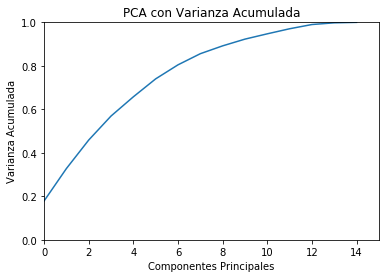

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([128.23409113, 117.07478782, 109.86519457, 100.79318   ,
        90.19598181,  87.17209988,  77.03250824,  68.64636796,
        57.62203692,  53.34373119,  47.39033023,  46.28425172,
        42.35471669,  26.84181881,  13.99020201])

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(48290, 15)
(48290, 12)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(48290, 15)

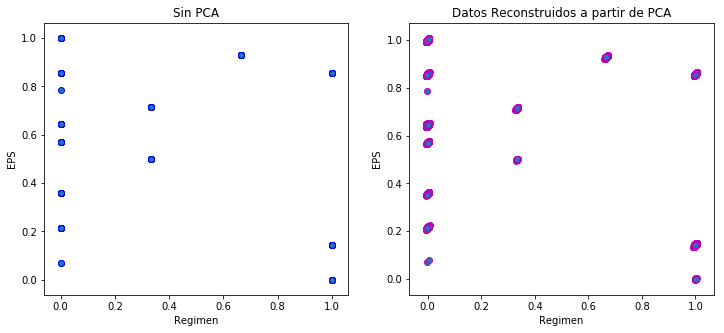

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Regimen')
pyplot.ylabel('EPS')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Regimen')
pyplot.ylabel('EPS')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# K MEANS


Para  2  Clusters: 
El total de datos de la clase  0  son:  19747
El total de datos de la clase  1  son:  28543
Para  3  Clusters: 
El total de datos de la clase  0  son:  16615
El total de datos de la clase  1  son:  10871
El total de datos de la clase  2  son:  20804
Para  4  Clusters: 
El total de datos de la clase  0  son:  10773
El total de datos de la clase  1  son:  10237
El total de datos de la clase  2  son:  12942
El total de datos de la clase  3  son:  14338
Para  5  Clusters: 
El total de datos de la clase  0  son:  9199
El total de datos de la clase  1  son:  9396
El total de datos de la clase  2  son:  8124
El total de datos de la clase  3  son:  8022
El total de datos de la clase  4  son:  13549
Para  6  Clusters: 
El total de datos de la clase  0  son:  8106
El total de datos de la clase  1  son:  8793
El total de datos de la clase  2  son:  7694
El total de datos de la clase  3  son:  8026
El total de datos de la clase  4  son:  8597
El total de datos de la clase  5  s

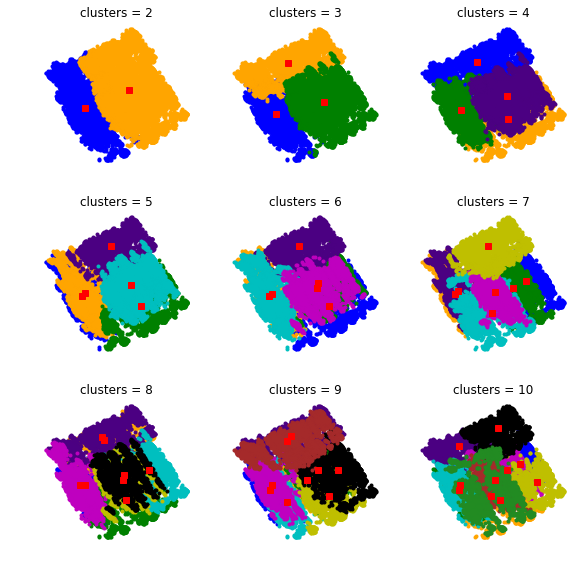

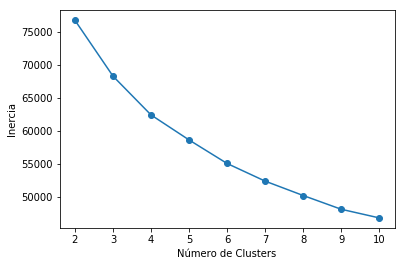

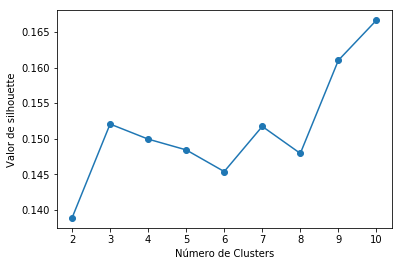

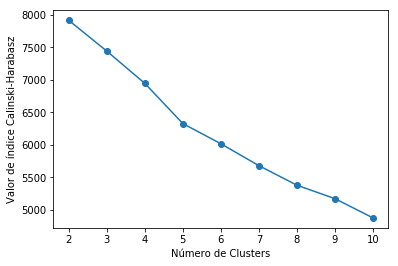

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabaz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabaz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])
    
    print("Para ", ncenters, " Clusters: ")   
    for i in range (len(np.unique(Etiquetas))):
        
        print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))
    
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()